<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Thank you for taking the time to improve the project! It is now accepted, and you can move on to the next sprint! Good luck!
    
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are a couple of problems that need to be fixed before the project is accepted. Let me know if you have questions!

# Project Description
Sweet Lift Taxi company has historical data on taxi orders at airports. The goal is to predict the number of taxi orders for the next hour to attract more drivers during peak hours. The model should achieve an RMSE metric on the test set of no more than 48.

# Table of Contents

## 1. Project Description
### Sweet Lift Taxi
- Predicting taxi orders at airports for the next hour.
- RMSE metric on the test set should not be more than 48.

## 2. Data Description
- Features:
  - [List the features here]

## 3. Import Libraries and Preprocess the Data
- Import necessary libraries.
- Load and preprocess the data.

## 4. Resample the Data by One Hour
- Resample the data to hourly intervals.

## 5. Exploratory Data Analysis (EDA)
- Explore and analyze the dataset.

## 6. Train Different Models with Various Hyperparameters
- Perform model training using different algorithms and hyperparameters.

## 7. Feature Engineering
- Engineer new features or transform existing ones as needed.

## 8. Split the Data
- Split the data into training and testing sets.

## 9. Scaling the Features
- Scale the features if necessary.

## 10. Training Different Models
### 10.1. Linear Regression
- Train and evaluate a Linear Regression model.

### 10.2. Random Forest Regressor
- Train and evaluate a Random Forest Regressor model.

### 10.3. Catboost Regressor
- Train and evaluate a Catboost Regressor model.

### 10.4. LightGBM Regressor
- Train and evaluate a LightGBM Regressor model.

## 11. Conclusion
- Summarize findings and conclusions from the model evaluations.


## Preparation

Importing the necessary libraries

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from pprint import pprint
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.preprocessing import StandardScaler
import time
from statistics import mean
import catboost as cb
from sklearn.preprocessing import OrdinalEncoder
from catboost import Pool, cv
import math
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import calendar

import datetime


warnings.filterwarnings('ignore')

CPU times: user 1.51 s, sys: 364 ms, total: 1.88 s
Wall time: 1.89 s


Importing Data

In [2]:
%matplotlib inline
plt.rc('figure', figsize =(18,3))
plt.rcParams['figure.facecolor'] = 'w'
pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.options.display.max_rows= 30

In [3]:
#Import the data
try:
    data = pd.read_csv('/datasets/taxi.csv',parse_dates = ['datetime'], index_col = 'datetime')
    
except:
    print("Something went wrong when opening the file")

In [4]:
data.sort_index(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [7]:
# Resample it by one hour 
data = data.resample('1H').sum()

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was resampled correctly

</div>

In [8]:
#checking the resample
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [9]:
data.describe()

,num_orders
count,4416.00
mean,84.42
std,45.02
min,0.00
25%,54.00
50%,78.00
75%,107.00
max,462.00


## Analysis

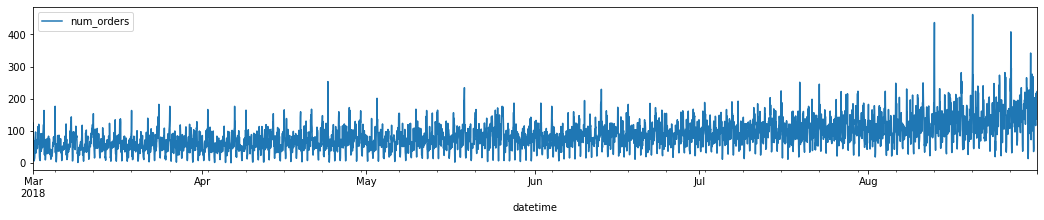

In [10]:
#plot the number of orders per hourfor all the data
data.plot();

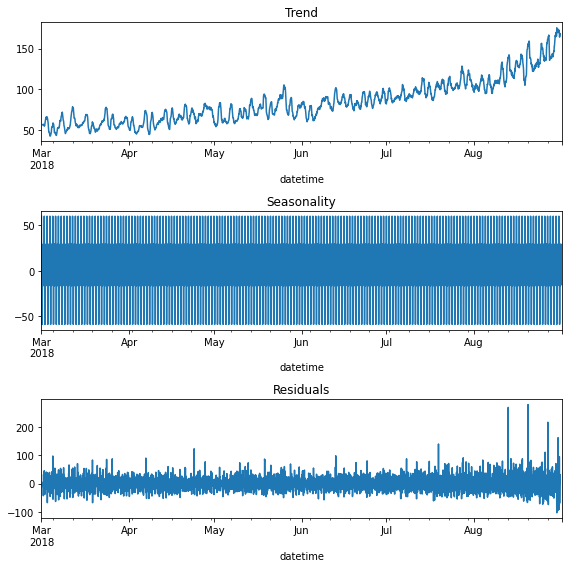

In [11]:
#Plot decomposed 
decomposed = seasonal_decompose(data)

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')


# plt.subplot(x,y,z) says that the images make a table
# of x rows and y columns.
# z is the place of the current image.

# plt.subplot(311) says 3 rows, 1 column, first image. 

plt.tight_layout()    # this helps fit subplots into the area

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The seasonal pattern would be easier to see if you plotted a smaller slice of `decomposed.seasonal`

</div>

In [12]:
values = pd.DataFrame(data.num_orders.values)
width =3
shifted = values.shift(width-1)
window = shifted.rolling(window=width)

df = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df.columns =['min','mean','max','t+1']

In [13]:
df.head()

,min,mean,max,t+1
0,NaN,NaN,NaN,124
1,NaN,NaN,NaN,85
2,NaN,NaN,NaN,71
3,NaN,NaN,NaN,66
4,71.00,93.33,124.00,43


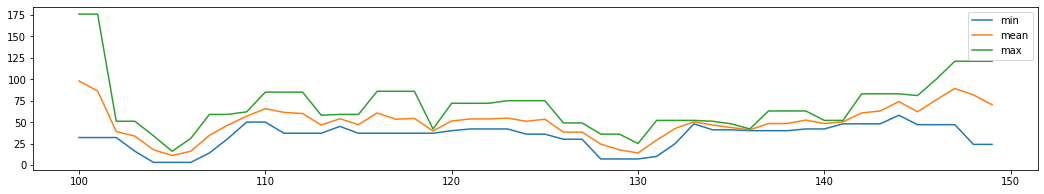

In [14]:
df[['min','mean','max']].iloc[100:150].plot();

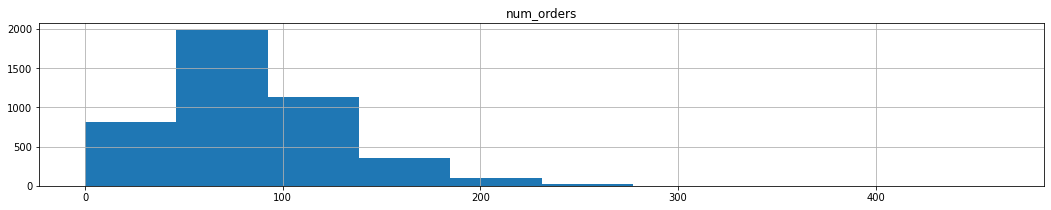

In [15]:
data.hist();

In [16]:
df = pd.DataFrame()
df['num_orders'] = data.num_orders.values
df['dayofweek'] = data.index.dayofweek
df['month'] = data.index.month

In [17]:
#The day of the week with Monday=0, Sunday=6.
def day_to_day(col):
    
    if col == 0:
        return 'monday'
    elif col == 1:
        return 'tuesday'
    elif col == 2:
        return 'wednesday'
    elif col == 3:
        return 'thursday'
    elif col == 4:
        return 'friday'
    elif col == 5:
        return 'saturday'
    elif col == 6:
        return 'sunday'

In [18]:
df['week_day'] = df['dayofweek'].apply(day_to_day)

In [19]:
df = df.sort_values('month')
df

,num_orders,dayofweek,month,week_day
0,124,3,3,thursday
490,57,2,3,wednesday
491,71,2,3,wednesday
492,37,2,3,wednesday
493,64,2,3,wednesday
...,...,...,...,...
3922,140,5,8,saturday
3923,81,5,8,saturday
3924,63,5,8,saturday
3915,171,5,8,saturday


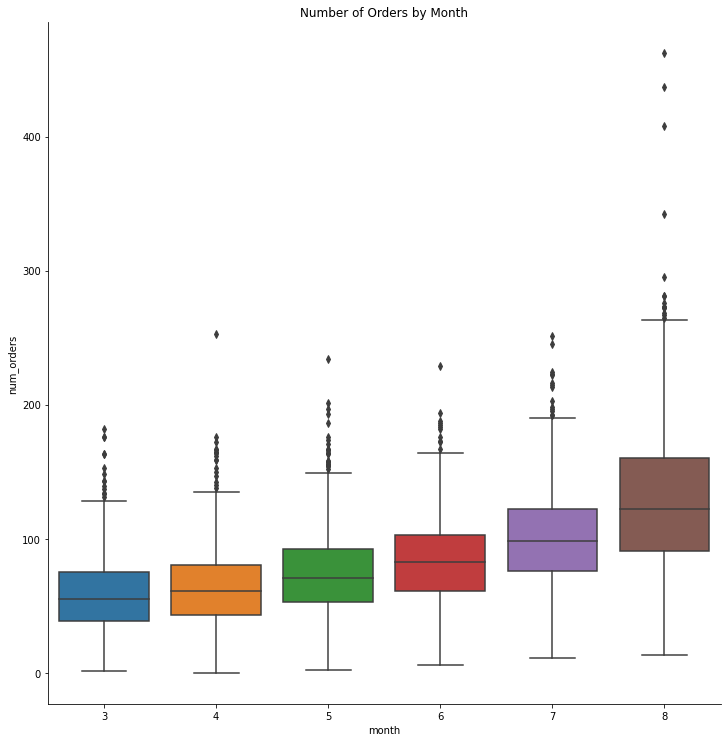

In [20]:
sns.catplot(x="month", y="num_orders", kind="box", data=df, size = 10)
plt.title("Number of Orders by Month")
plt.show()

In [21]:
df = df.sort_values('dayofweek')
df

,num_orders,dayofweek,month,week_day
955,62,0,4,monday
275,84,0,3,monday
276,45,0,3,monday
3628,140,0,7,monday
3629,119,0,7,monday
...,...,...,...,...
2931,89,6,7,sunday
2930,100,6,7,sunday
2929,84,6,7,sunday
1255,9,6,4,sunday


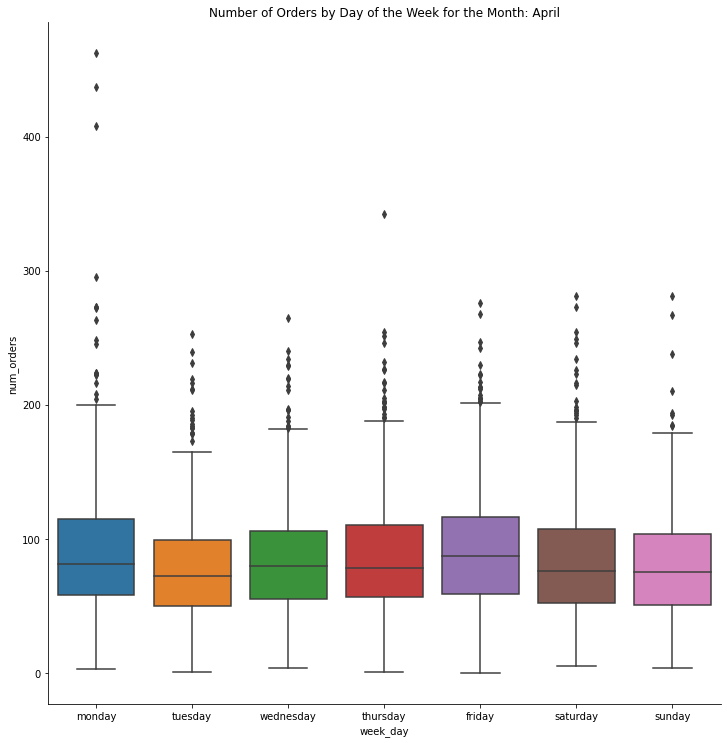

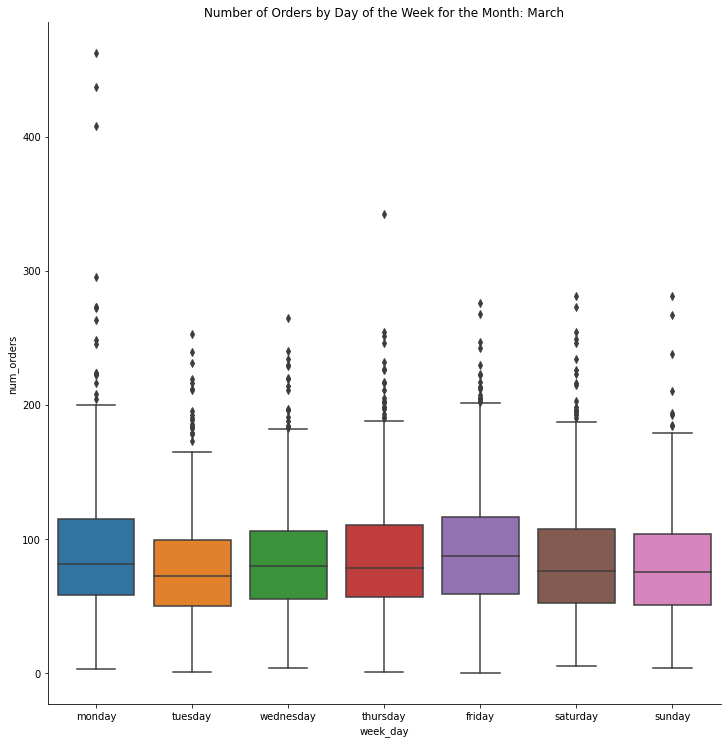

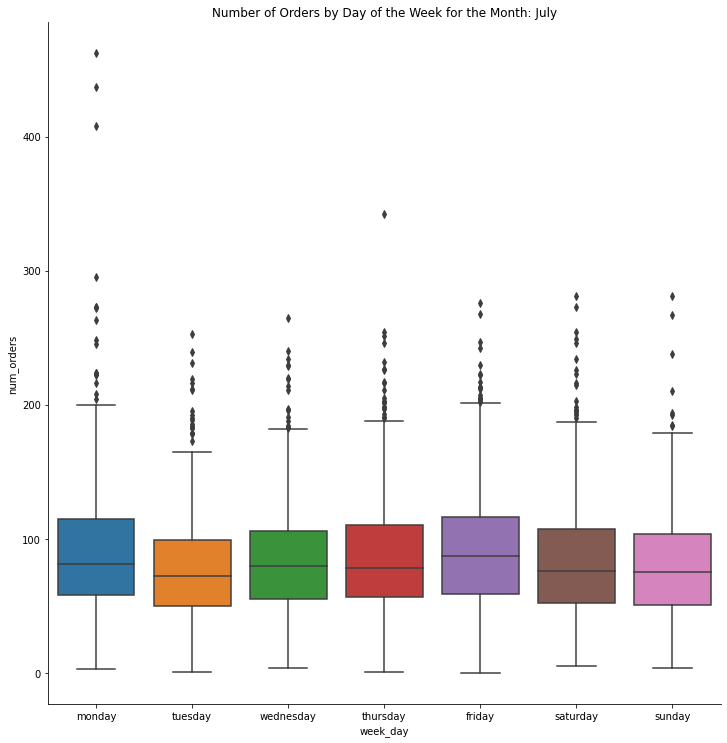

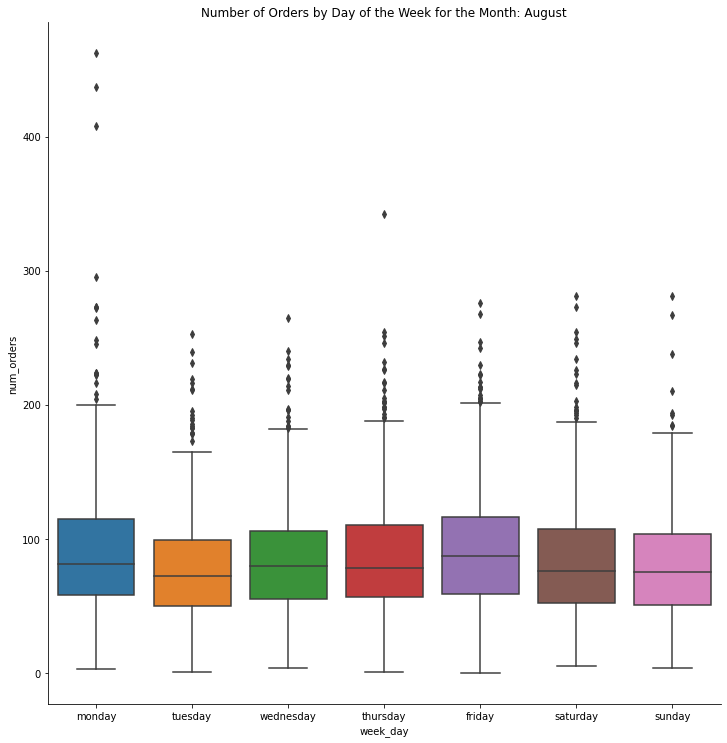

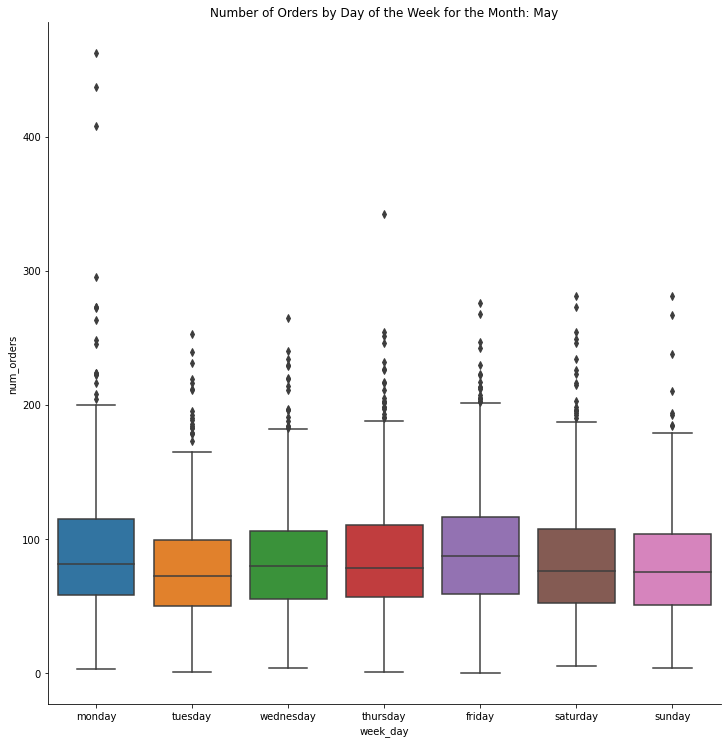

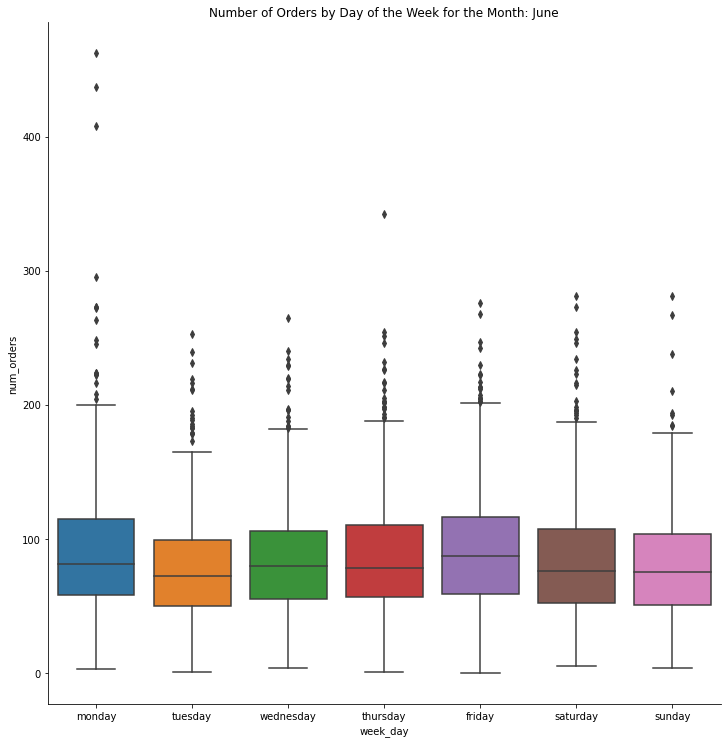

In [22]:
for month in list(df.month.unique()):
    sns.catplot(x="week_day", y="num_orders", kind="box", data=df, size = 10)
    plt.title("Number of Orders by Day of the Week for the Month: " +calendar.month_name[month])
    plt.show()

In [23]:
rolling = data.rolling(window=3)
rolling_mean = rolling.mean()

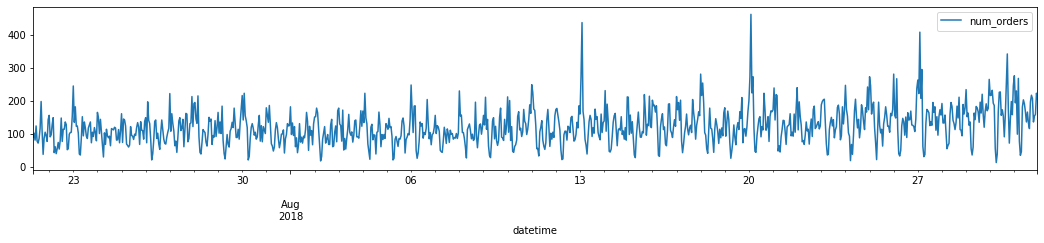

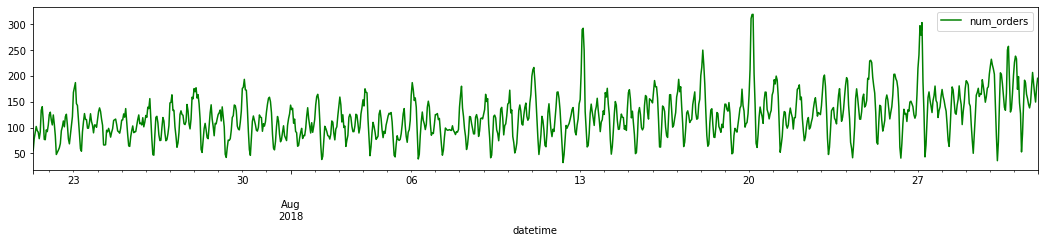

In [24]:
data[-1000:].plot()
rolling_mean[-1000:].plot(color='green');

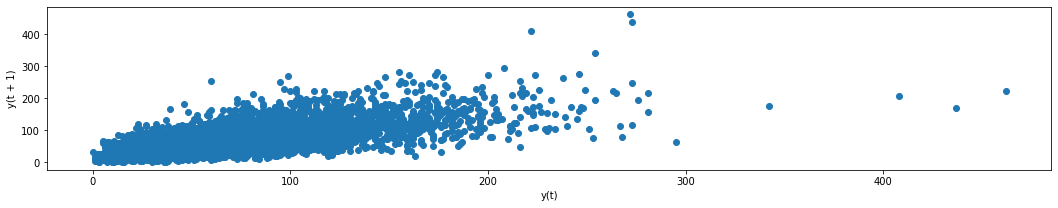

In [25]:
pd.plotting.lag_plot(data);

In [26]:
#note:there are ouliers above 300 that need to be removed
data_b =  data.query('num_orders <300')

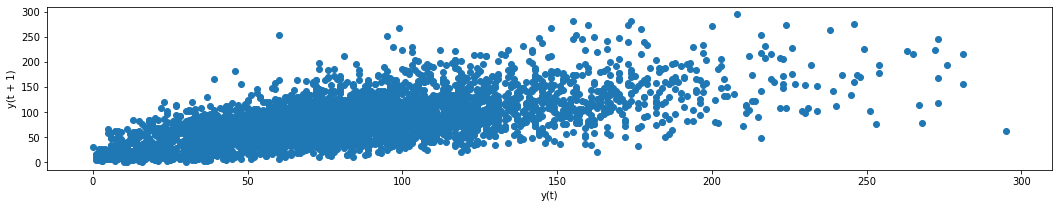

In [27]:
pd.plotting.lag_plot(data_b);

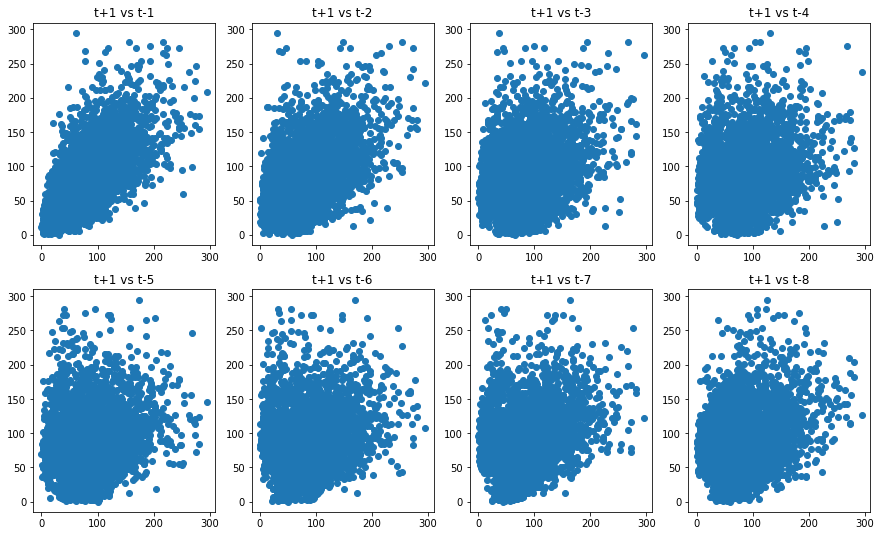

In [28]:
#create multiple lag scatter plots
values = pd.DataFrame(data_b.values)
lags =8
columns = [values]

for i in range(1,(lags+1)):
    columns.append(values.shift(i))

df = pd.concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags+1)):
    columns.append('t-' + str(i))

df.columns = columns

plt.figure(1, figsize=(15,9))
for i in range(1,(lags+1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)

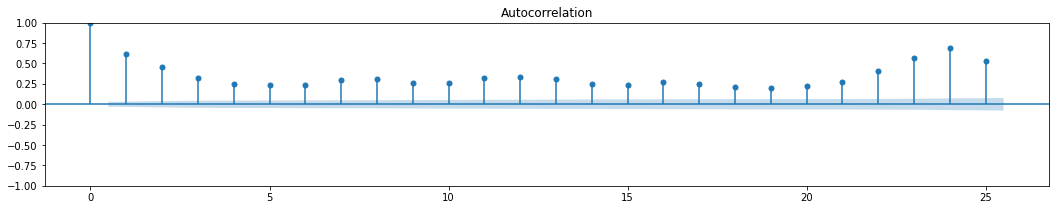

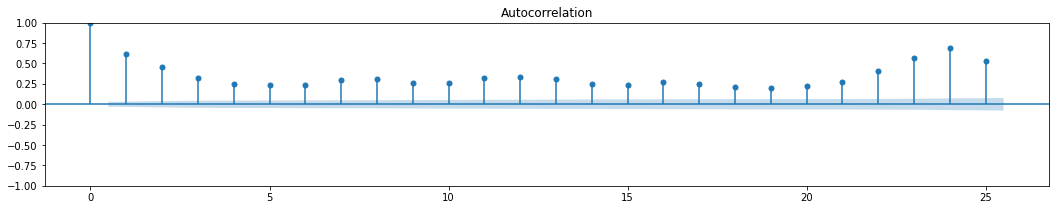

In [29]:
plot_acf(data_b, lags=25)

The data exhibits non-stationarity, necessitating a transformation to a stationary state for effective ML model training. Analysis through decomposition and box plots reveals August as the peak month, with Mondays and Fridays being the busiest days. Furthermore, outlier removal was performed for orders exceeding 300. Examining lag plots, autocorrelation function (ACF), and partial autocorrelation function (PACF) indicates correlation in recent lags, although some correlation persists in distant lags. This insight guides feature engineering for the models.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you explored the data, visualized it and made some useful observations

</div>

### Train Different Models with Various Hyperparameters

Our goal is to reach an RMSE metric on the test set of no more than 48.

### Features Engineering

In [30]:
#Making the data stationary
data_diff = data_b - data_b.shift()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice!

</div>

<AxesSubplot:xlabel='datetime'>

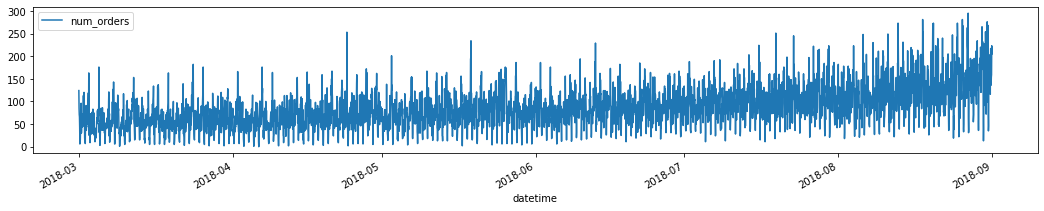

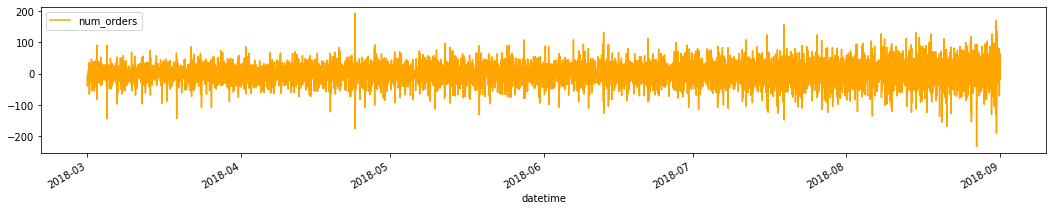

In [31]:
data_b.plot();
data_diff.plot(color='orange')

In [32]:
df_ml = data_diff.copy()

In [33]:
#function tomake feature based on EDA
def make_features(data, max_lag, rolling_mean_size):
    
    data['month'] = data.index.month
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
    data['rolling_mean'] = data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    

    data['rolling_max'] = data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).min()
    

    data['rolling_min'] = data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).max()
    return data

<div class="alert alert-success">
<b>Reviewer's comment</b>

Feature engineering looks good: there are calendar features, lag features and shifted rolling window statistics

</div>

In [34]:
make_features(df_ml,24,24)
df_ml

,num_orders,month,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,rolling_max,rolling_min
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,NaN,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,-39.00,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,-14.00,3,2,3,-39.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,-5.00,3,3,3,-14.00,-39.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,-23.00,3,4,3,-5.00,-14.00,-39.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,-71.00,8,19,4,-10.00,20.00,81.00,-17.00,-33.00,30.00,...,-82.00,30.00,88.00,-40.00,56.00,70.00,-105.00,169.00,-190.00,169.00
2018-08-31 20:00:00,18.00,8,20,4,-71.00,-10.00,20.00,81.00,-17.00,-33.00,...,36.00,-82.00,30.00,88.00,-40.00,56.00,70.00,169.00,-190.00,169.00
2018-08-31 21:00:00,5.00,8,21,4,18.00,-71.00,-10.00,20.00,81.00,-17.00,...,-131.00,36.00,-82.00,30.00,88.00,-40.00,56.00,169.00,-190.00,169.00


In [35]:
#changing the target back
df_ml['num_orders']=data_b['num_orders']

In [36]:
df_ml.head()

,num_orders,month,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,rolling_max,rolling_min
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,3,-39.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,3,-14.00,-39.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,3,-5.00,-14.00,-39.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#checking missing values
report = df_ml.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df_ml.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False).style.background_gradient('coolwarm')

,missing_values,% of total
rolling_min,25,0.010000
rolling_max,25,0.010000
rolling_mean,25,0.010000
lag_24,25,0.010000
lag_23,24,0.010000
lag_22,23,0.010000
lag_21,22,0.000000
lag_20,21,0.000000
lag_19,20,0.000000
lag_18,19,0.000000


In [38]:
#droping na values
df_ml.dropna(inplace=True)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep, it makes sense to drop missing values for the first few rows which don't have enough lags

</div>

In [39]:

report = df_ml.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df_ml.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False).style.background_gradient('coolwarm')

,missing_values,% of total
num_orders,0,0.000000
lag_13,0,0.000000
rolling_max,0,0.000000
rolling_mean,0,0.000000
lag_24,0,0.000000
lag_23,0,0.000000
lag_22,0,0.000000
lag_21,0,0.000000
lag_20,0,0.000000
lag_19,0,0.000000


## Splitting the Data

We will now split the data into training and testing sets to prepare for model training and evaluation.\

In [40]:
#the test sample should be 10% of the initial dataset.
train, test = train_test_split(df_ml, shuffle=False, test_size=0.1)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test without shuffling

</div>

In [41]:
target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)
target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

## Scaling the Features

We will scale the features to ensure that they are on a similar scale, which is important for many machine learning algorithms.

In [42]:
scaler = MinMaxScaler()
train_scaled_features= pd.DataFrame(scaler.fit_transform(features_train))
test_scaled_features=pd.DataFrame(scaler.transform(features_test))

### Training the Linear Regression Model

We will now train a Linear Regression model to predict taxi orders at airports for the next hour.

In [43]:
model = LinearRegression()
model.fit(train_scaled_features, target_train)
pred_train = model.predict(train_scaled_features)
pred_test = model.predict(test_scaled_features)
print('RMSE on train:', math.sqrt(mean_squared_error(target_train, pred_train)))
print('RMSE on test:', math.sqrt(mean_squared_error(target_test, pred_test)))

RMSE on train: 26.215617665380822
RMSE on test: 49.57334060234024


### Training Random Forest Regressor Model

def train_fit_score(model, params, name, scoring, n_splits=5):
    # Using TimeSeriesSplit for cross-validation in time series analysis
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Setting up GridSearchCV with TimeSeriesSplit
    grid_search = GridSearchCV(model, param_grid=params, cv=tscv, scoring=scoring, verbose=0, refit=True)
    grid_search.fit(train_scaled_features, target_train)
    
    # Returning a DataFrame with results
    return pd.DataFrame([[name, abs(grid_search.best_score_), grid_search.best_params_]], 
                        columns=['Estimator', 'Best Score', 'Best Params'])

# Parameters adjusted to try shallower trees
params = {
    'n_estimators': range(150, 250, 25),
    'max_depth': range(10, 50, 10)  # Reduced max depth
}

# Training Random Forest Regressor with TimeSeriesSplit
results = train_fit_score(RandomForestRegressor(random_state=12345), params, 'Random Forest', scoring='neg_root_mean_squared_error')
print(results)


In [ ]:
def train_fit_score(model, params, name, scoring, n_splits=5):
    # Initialize TimeseriesSplit
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Setting up GridSearchCV with TimeSeriesSplit instead of standard cross-validation
    grid_search = GridSearchCV(model, param_grid=params, cv=tscv, scoring=scoring, verbose=0, refit=True)
    grid_search.fit(train_scaled_features, target_train)
    
    # Returning a DataFrame with the model name, best score, and best parameters
    return pd.DataFrame([[name, abs(grid_search.best_score_), grid_search.best_params_]], 
                        columns=['Estimator', 'Best Score', 'Best Params'])

#Parameters adjusted to try shallower trees
params = {
    'n_estimators': range(150, 250, 25),
    'max_depth': range(10, 30, 5) # smaller depth values
}

#Create and train the Random Forest Regressor with new adjustments
RandomForest = train_fit_score(RandomForestRegressor(random_state=12345), 
                               params, 
                               'Random Forest', 
                               scoring='neg_root_mean_squared_error')

#Printing the best parameters found during the grid search
print("Best Parameters:", RandomForest['Best Params'].iloc[0])


In [44]:
def train_fit_score(model, params, name, scoring, n_splits=3):
    # Reduce the number of splits to reduce the number of models being trained
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Setting up GridSearchCV with TimeSeriesSplit
    grid_search = GridSearchCV(model, param_grid=params, cv=tscv, scoring=scoring, verbose=0, refit=True)
    grid_search.fit(train_scaled_features, target_train)
    
    # Returning a DataFrame with results
    return pd.DataFrame([[name, abs(grid_search.best_score_), grid_search.best_params_]], 
                        columns=['Estimator', 'Best Score', 'Best Params'])

# More focused and potentially optimal parameters
params = {
    'n_estimators': [150, 200],  # Fewer options for n_estimators
    'max_depth': [10, 15]        # Further reduced max_depth to avoid excessively large trees
}

# Train the model with the revised settings
results = train_fit_score(RandomForestRegressor(random_state=12345), 
                          params, 'Random Forest', scoring='neg_root_mean_squared_error')

# Print the results
print("Best Parameters:", results['Best Params'].iloc[0])

Best Parameters: {'max_depth': 15, 'n_estimators': 200}


In [45]:
list(range(10, 30, 5))

[10, 15, 20, 25]

In [46]:
2**20

1048576

In [47]:
2**25

33554432

In [48]:
2**15

32768

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Regular k-fold cross-validation is not suitable for time series models, but you can use [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) instead (just pass an object of this class as the `cv` parameter)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

<div class="alert alert-warning">
<b>Student's comment V2</b>

1. I tried to update that code cell above by descresing maximum tree depth further, reducing the upper limit, and narrowing the range to prevent large trees. 

2. Optimizing the range and stepping for the n_estimators and max_depth instead of a broad range. 


</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

1. In the above cell you're training `len(range(150, 250, 25)) * len(range(10, 30, 5)) * n_splits = 4 * 4 * 5 = 80` models, which takes a long time.
    
2. The depth values you're trying are still too high: `list(range(10, 30, 5)) = [10, 15, 20, 25]` and even the tree with depth 20 will have about 20 million nodes

</div>

#Create Random Forest Regressor
RandomForest = train_fit_score(RandomForestRegressor(random_state=12345), 
                       {'n_estimators' : range(150, 250, 25),
                        'max_depth' : range(10, 30, 5),
                        }, 'Random Forest',scoring='neg_root_mean_squared_error')

<div class="alert alert-warning">
<b>Reviewer's comment</b>

`max_depth` values you're trying are too big: a tree with `max_depth=45` may have up to $2^{45}$ leaves, this is a huge number.

</div>

In [52]:
print("Best Parameters:", results['Best Params'].iloc[0])

Best Parameters: {'max_depth': 15, 'n_estimators': 200}


In [ ]:
model = RandomForestRegressor(random_state=12345, n_estimators=200,max_depth=45)
model_random_forest = model.fit(train_scaled_features, target_train)
predictions_train = model.predict(train_scaled_features)
predictions_test = model.predict(test_scaled_features)
print('RMSE on train:',math.sqrt(mean_squared_error(target_train, predictions_train)))
print('RMSE on test:', math.sqrt(mean_squared_error(target_test, predictions_test)))

In [ ]:
RandomForest

### Training the CatBoost Regressor Model

Now, we will train a CatBoost Regressor model to predict taxi orders at airports for the next hour.

In [ ]:
#splitting the train set to validation set for catboost and LightGBM
train_df, valid_df = train_test_split(train, test_size=0.1, random_state=12345)

In [ ]:
target_train = train_df['num_orders']
features_train = train_df.drop('num_orders', axis=1)
target_valid = valid_df['num_orders']
features_valid  = valid_df.drop('num_orders', axis=1)

In [ ]:
scaler = MinMaxScaler()
train_scaled_features= pd.DataFrame(scaler.fit_transform(features_train))
valid_scaled_features=pd.DataFrame(scaler.transform(features_valid))

In [ ]:
%%time
#Training Catboost regressor
#seting an empthy data frame
Catboost_parameters = pd.DataFrame()
#lists for dataframe
cb_score_train = []
cb_score_valid = []
estimators = []
depths = []
#iteration through different parameters to find the best RandomForestRegressor parameters
for n in range(50,250, 50):
    for depth in range(0, 20 ,4):
        model=cb.CatBoostRegressor(max_depth=depth, iterations=n,loss_function= "RMSE",verbose= 10)
        model.fit(train_scaled_features, target_train)
        y_train_pred = model.predict(train_scaled_features)
        y_val_pred = model.predict(valid_scaled_features)
        train_RMSE = (mean_squared_error(target_train, y_train_pred))**0.5
        validation_RMSE = (mean_squared_error(target_valid, y_val_pred))**0.5
        
        cb_score_train.append(train_RMSE)
        cb_score_valid.append(validation_RMSE)
        estimators.append(n)
        depths.append(depth)
Catboost_parameters['iterations'] = estimators
Catboost_parameters['depths']=depths
Catboost_parameters['RMSE_score_train']=cb_score_train
Catboost_parameters['RMSE_score_valid']=cb_score_valid

In [ ]:
Catboost_parameters[Catboost_parameters['RMSE_score_valid'] == Catboost_parameters.RMSE_score_valid.min()]

In [ ]:
%%time

#Catboost Regressor
cb_model = cb.CatBoostRegressor(max_depth=4, iterations=150,loss_function= "RMSE",verbose= 10)
cb_model.fit(train_scaled_features, target_train)
cb_y_val_test = cb_model.predict(test_scaled_features)
cb_test_RMSE = (mean_squared_error(target_test, cb_y_val_test))**0.5
print('The RMSE for Catboost Regressor is:',round(cb_test_RMSE,2))

In [ ]:
%%time
#seting an empthy data frame
lgm_parameters = pd.DataFrame()
#lists for dataframe
lgm_score_train = []
lgm_score_valid = []
estimators = []
depths = []
num_leaves = []
#iteration through different parameters to find the best RandomForestRegressor parameters
for n in range(10,200, 10):
    for leave in range(10,100, 10):
        for depth in range(10, 200 ,10):
            model=lgb.LGBMRegressor(boosting_type='gbdt', max_depth= depth, n_estimators=n, num_leaves= leave)
            model.fit(train_scaled_features, target_train)
            y_train_pred = model.predict(train_scaled_features)
            y_val_pred = model.predict(valid_scaled_features)
            train_RMSE = (mean_squared_error(target_train, y_train_pred))**0.5
            validation_RMSE = (mean_squared_error(target_valid, y_val_pred))**0.5

            lgm_score_train.append(train_MAE)
            lgm_score_valid.append(validation_RMSE)
            num_leaves.append(leave)
            estimators.append(n)
            depths.append(depth)
            
lgm_parameters['n_estimators'] = estimators
lgm_parameters['num_leaves']=num_leaves
lgm_parameters['depths']=depths
lgm_parameters['train_RMSE']=lgm_score_train
lgm_parameters['RMSE_score_valid']=lgm_score_valid

In [ ]:
lgm_parameters[lgm_parameters['RMSE_score_valid'] == lgm_parameters.RMSE_score_valid.min()]

In [ ]:
%%time

#LightGBM Regressor
lgb_model = lgb.LGBMRegressor(boosting_type='gbdt', max_depth= 30, n_estimators=120,num_leaves=60)
lgb_model.fit(train_scaled_features, target_train)
lgb_y_val_pred = lgb_model.predict(test_scaled_features)
lgb_test_RMSE = (mean_squared_error(target_test, lgb_y_val_pred))**0.5
print('The RMSE for LightGBM Regressor is:',round(lgb_test_RMSE,2))

Note:
The model with the best result is LightGBM Regressor with RMSE of 45.87

Conclusion
In this project, I've shown how to predict the number of taxi orders m for the next hour base on time series and using different models with different parameter tuning. The best model is the LightGBM Regressor, with the lowest RMSE of 45.87. To reach this result, there were a lot of features created and processing which were based on stationary data. To solve the original data, we needed to use the original data for the target. In the end, the goal of the project - The RMSE metric on the test set should not be more than 48 has been achieved.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a few different models and tune their hyperparameters either using a validation set or cross-validation. The final models were evalauted using the test set

</div>

I need help with the process after the Random Forest Regressor. It seems like none of my code is working after the Linear Regression one. Please show me or help me find the solution for that and any other feedback you could give me for this project?

<div class="alert alert-warning">
<b>Reviewer's comment</b>

As far as I can tell, the models simply take too much memory due to very high `max_depth` values and the kernel hangs. Try using smaller values :)
    
I left a couple of other suggestions above!

</div>